# Project_1 (Delhi house predection)

### STEP-1 : Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP-2 : Import DataSet

In [2]:
df1 = pd.read_csv("MagicBricks.csv")
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


##                                                    DATA CLEANING 

### STEP-3 : Understand the data

##### 3.1 Get the shape of DataSet i.e. Row & Column

In [3]:
df1.shape

(1259, 11)

##### 3.2 look at the data types for each column

In [4]:
df1.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

##### 3.3 To see all the rows and columns...we use set_option() function

In [5]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
df1.head(6)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


##### 3.4 Read the last five rows

In [6]:
df1.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


##### 3.5 Return an array of column names

In [7]:
df1.columns.values

array(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking',
       'Price', 'Status', 'Transaction', 'Type', 'Per_Sqft'], dtype=object)

##### 3.6 Information about the dataset....columns 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


### STEP-4 : Check Missing Values

##### 4.1 checking missing values in the form of True for 'missing components' & False for 'non-missing cells'.

In [9]:
df1.isnull()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


##### 4.2 Only want to know if there are any missing values

In [10]:
df1.isnull().values.any()

True

##### 4.3 knowing how many missing values in the data

In [11]:
df1.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

##### 4.4 Missing values Visualizations 

<AxesSubplot:>

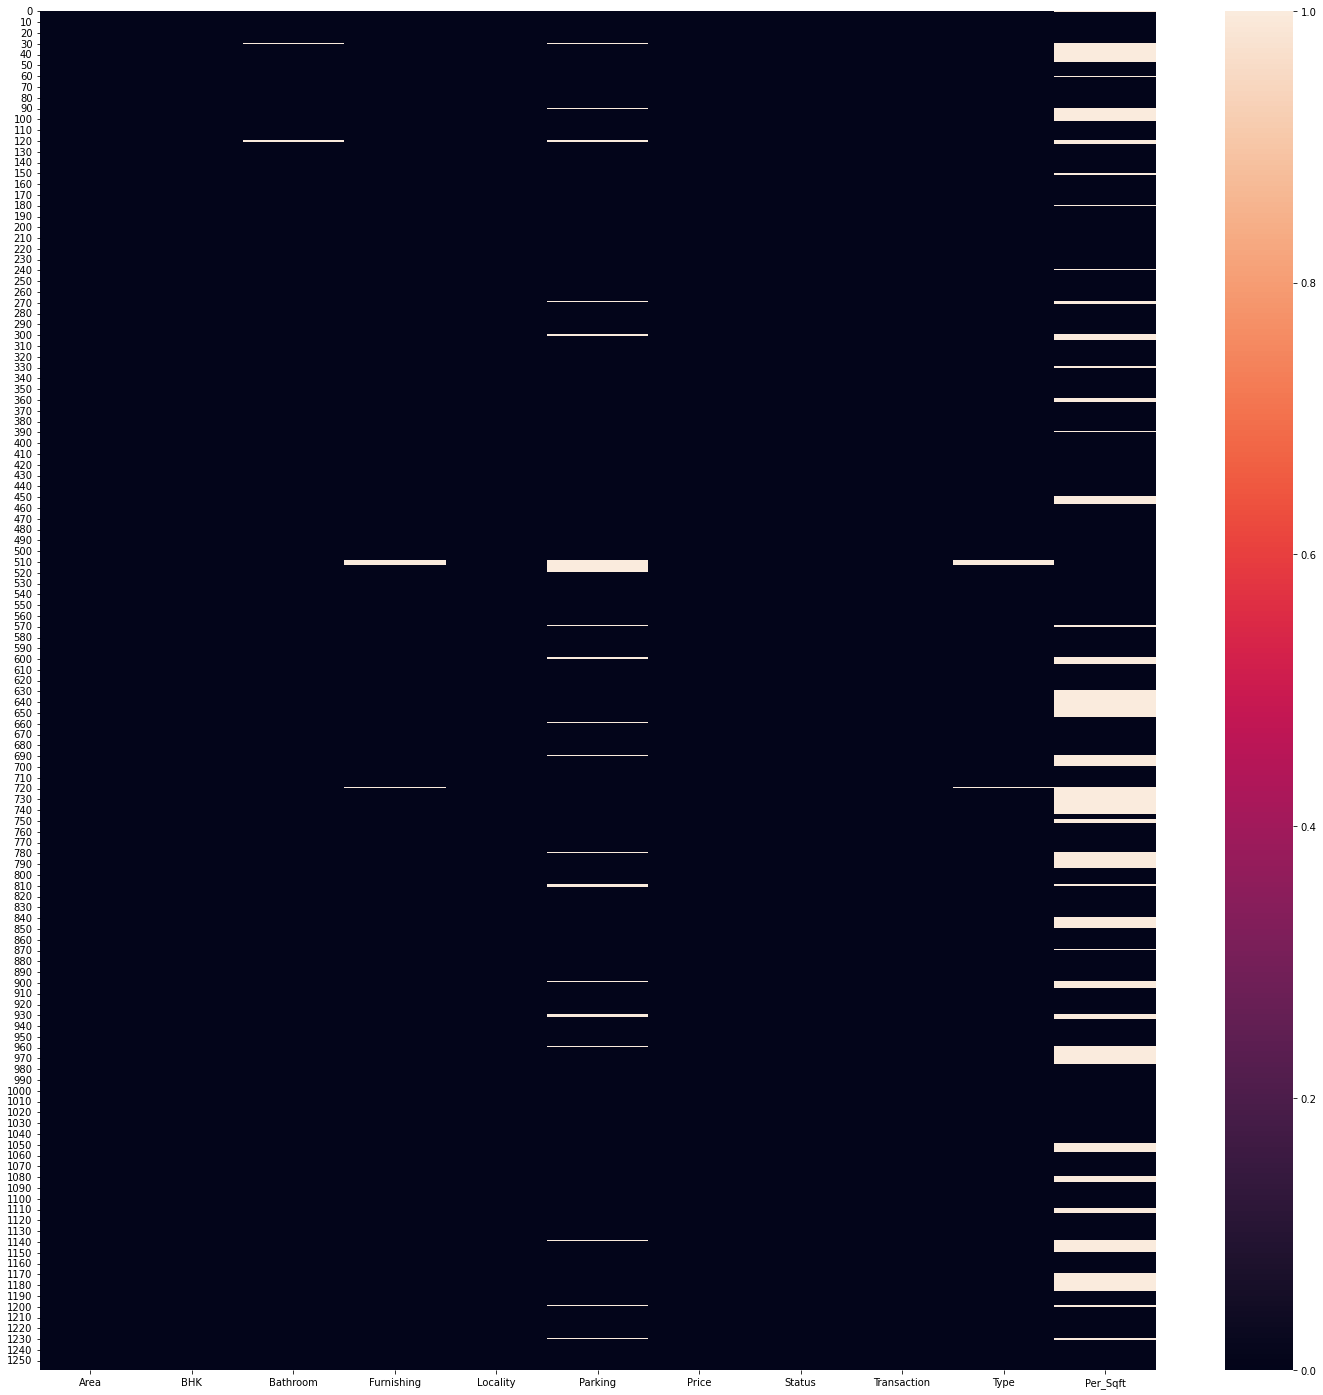

In [12]:
plt.figure(figsize=(25,25))

sns.heatmap(df1.isnull())

##### 4.5 Get the missing values in percentage form

In [13]:
# df1.shape[0] means null_column of df1.

df2 = df1.isnull().sum() / df1.shape[0] *100
df2

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

##### 4.6 Get the column which have more null values

In [14]:
get_null_clm = df2[df2 > 17].keys()
get_null_clm

Index(['Per_Sqft'], dtype='object')

##### 4.7 Remove the column which have more null values

In [ ]:
df3 = df1.drop(columns = get_null_clm)
df3

In [ ]:
df3.shape

In [ ]:
df3.isnull().sum()

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3.isnull())

##### 4.8 Replace the missing values for numerical columns with mean() function

In [ ]:
df3['Parking'] = df3['Parking'].fillna(df3['Parking'].mean())
#df3['Furnishing'] = df3['Furnishing'].fillna(df3['Furnishing'].mean())     this is string value
df3['Bathroom'] = df3['Bathroom'].fillna(df3['Bathroom'].mean())

In [ ]:
df3.isnull().sum()

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3.isnull())

# Data Preprocessing

### STEP-5 : OneHot Encoding

In [ ]:
df4 = df3.drop(columns = 'Locality') # "Locality" has large number of variables so, drop it.
df4

In [ ]:
pd.get_dummies(df4)

In [ ]:
df5 = pd.get_dummies(df4 , drop_first=True)
df5

### STEP-6 : Feature Scaling

### 6.1. Standardization

##### 6.1.1 Import Library 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#### 6.1.2 Create X = Matrix for independent variables and Y = Vector for dependent variable 

In [ ]:
X = df5.drop(columns='Price')
Y = df5["Price"]

print("shape of X = " , X.shape)
print("shape of Y = " , Y.shape)

#### 6.1.3 Call the train_test_split() function which gives 4 parameters (X_train , X_test , Y_train , Y_test)

In [ ]:
X_train , X_test , Y_train , Y_test =  train_test_split(X , Y , test_size= 0.2 , random_state=51)
print("shape of X_train = " , X_train.shape)
print("shape of Y_train = " , Y_train.shape)
print("shape of X_test = " , X_test.shape)
print("shape of Y_test = " , Y_test.shape)

#### 6.1.4 StandardScalar() function

In [ ]:
sc = StandardScaler()

#Now we have to only fit the train dataset
sc.fit(X_train)

In [ ]:
# here from the trained data ....standardscaler learned the mean and standard deviation

#### 6.1.5 Check the Mean and standard deviation of trained data.

In [ ]:
sc.mean_    #Mean

In [ ]:
sc.scale_   # Standard deviation

In [ ]:
X_train.describe()   # To see in details

#### 6.1.6 Now transfer this data to the dataset in Matrix form

In [ ]:
X_train_matrix = sc.transform(X_train)
X_test_matrix =sc.transform(X_test)

X_train_matrix

#### 6.1.7 convert this dataset into dataframe

In [ ]:
X_train_df = pd.DataFrame(X_train_matrix , columns=["Area" , "BHK" ,"Bathroom" , "Parking" , "Furnishing_Semi-Furnished" ,"Furnishing_Unfurnished", "Status_Ready_to_move" , "Transaction_Resale","Type_Builder_Floor"])
X_test_df = pd.DataFrame(X_test_matrix , columns=["Area" , "BHK" ,"Bathroom" , "Parking" , "Furnishing_Semi-Furnished" ,"Furnishing_Unfurnished", "Status_Ready_to_move" , "Transaction_Resale","Type_Builder_Floor"])

X_train_df.head()

In [ ]:
X_train_df.describe()

### 6.2. Normalization or Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmc = MinMaxScaler()
mmc.fit(X_train)

In [ ]:
X_train.describe()

In [ ]:
X_train_matrix_mmc = mmc.transform(X_train)
X_test_matrix_mmc =mmc.transform(X_test)

X_train_matrix_mmc

In [ ]:
X_train_df_mmc = pd.DataFrame(X_train_matrix_mmc , columns=["Area" , "BHK" ,"Bathroom" , "Parking" , "Furnishing_Semi-Furnished" ,"Furnishing_Unfurnished", "Status_Ready_to_move" , "Transaction_Resale","Type_Builder_Floor"])
X_test_df_mmc = pd.DataFrame(X_test_matrix_mmc , columns=["Area" , "BHK" ,"Bathroom" , "Parking" , "Furnishing_Semi-Furnished" ,"Furnishing_Unfurnished", "Status_Ready_to_move" , "Transaction_Resale","Type_Builder_Floor"])

X_train_df_mmc.head()

In [ ]:
X_train_df_mmc.describe()

# ALGORITHMS

### 1. Using Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_matrix , Y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(X_test_matrix , Y_test)

### 1.1 Ridge and Lasso Regression

##### Ridge is used to improve the aaccuracy/result percentage.

In [ ]:
from sklearn.linear_model import Ridge , Lasso

In [ ]:
rd = Ridge()

In [ ]:
rd.fit(X_train_matrix , Y_train)

In [ ]:
rd.score(X_test_matrix , Y_test)

##### Lasso is used to improve the aaccuracy/result percentage.

In [ ]:
ls = Lasso()

In [ ]:
ls.fit(X_train_matrix , Y_train)

ls.score(X_test_matrix , Y_test)

In [ ]:
# increasing the value of alpha...the accuracy also increases
ls2 = Lasso(alpha=2) 

ls2.fit(X_train_matrix , Y_train)

ls2.score(X_test_matrix , Y_test)

### 1.2 Model Evaluation 

#### Root Mean Square Method

In [ ]:
y_pred = lr.predict(X_test)
y_pred

In [ ]:
Y_test